<a href="https://colab.research.google.com/github/Deepandreinforcement/Image-to-3D-Cartoon/blob/main/Cartoon_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu kodda aşğıdaki linkten faydalandım.
https://www.reddit.com/r/StableDiffusion/comments/17rgr5a/from_photos_to_3d_cartoons_with_stable_diffusion/

Kütüphaneleri kuruyoruz.

In [1]:
!pip install diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.7 MB/s eta 0:00:00


Kütüphaneleri ekliyoruz.

In [2]:

import torch
from PIL import Image


Kullanacağımız modeli yüklüyoruz. Siz farklı bir model de seçebilirsiniz.

In [3]:
from diffusers import AutoPipelineForImage2Image

device = "cuda"
model_id_or_path = "frankjoshua/juggernautXL_version6Rundiffusion"
pipe = AutoPipelineForImage2Image.from_pretrained(model_id_or_path, torch_dtype=torch.float16, CFG=3, sampler='DPM++ 3M SDE  Karras')
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

Keyword arguments {'CFG': 3, 'sampler': 'DPM++ 3M SDE  Karras'} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Bundan sonra resmi yükleyip modele vereceğiz. Ben burada 5 farklı resim için  5 farklı görsel ürettim. Buradaki parametreler resme göre değişebiliyor. Ayrıca prompt kısmında resmi ifade etmemiz gerekiyor. Eğer detaylı ve iyi şekilde ifade edersek üretilen sonuç resme benziyor. Ama isterseniz prompt'larda değişiklik yaparak üretilen sonucu da değiştirebilirsiniz.
Örneğin göz rengi değiştirme gibi.

Resim 1

In [4]:
init_image=Image.open('i4.jpg')

prompt = "portrait of a 3d cartoon woman, wearing a black dress and looking at the camera with a blurry background, pixar style "

image = pipe(prompt=prompt, image=init_image,
             denoising_strength=0.6,
             strength=0.7
             ).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

Resim 2

In [7]:
init_image=Image.open('messi.jpg')
prompt = "portrait of a 3d cartoon Messi, pixar style "

image = pipe(prompt=prompt, image=init_image,
             denoising_strength=0.6,
             strength=0.6
             ).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

Resim 3

In [9]:
init_image=Image.open('i3.jpg')
prompt = "a cute 3d cartoon character of a black dog  is looking at the camera with a blurry background, pixar style, 3d cartoon illustration"

image = pipe(prompt=prompt, image=init_image,
             denoising_strength=0.6,
             strength=0.63
             ).images[0]

  0%|          | 0/31 [00:00<?, ?it/s]

Resim 4

In [11]:
init_image=Image.open('aslan.jpg')
prompt = "a 3d cartoon lion, pixar style, 3d cartoon illustration"

image = pipe(prompt=prompt, image=init_image,
             denoising_strength=0.6,
             strength=0.65
             ).images[0]

  0%|          | 0/32 [00:00<?, ?it/s]

Resim 5

In [13]:
init_image=Image.open('penguen.jpg')
prompt = "a cute 3d cartoon penguin  is walking with a blurry background, pixar style, 3d cartoon illustration"

image = pipe(prompt=prompt, image=init_image,
             denoising_strength=0.6,
             strength=0.63
             ).images[0]

  0%|          | 0/31 [00:00<?, ?it/s]

Resmi kaydediyoruz.

In [15]:
image.save('saved_image.jpg')

Resmi ekranda gösteriyoruz.

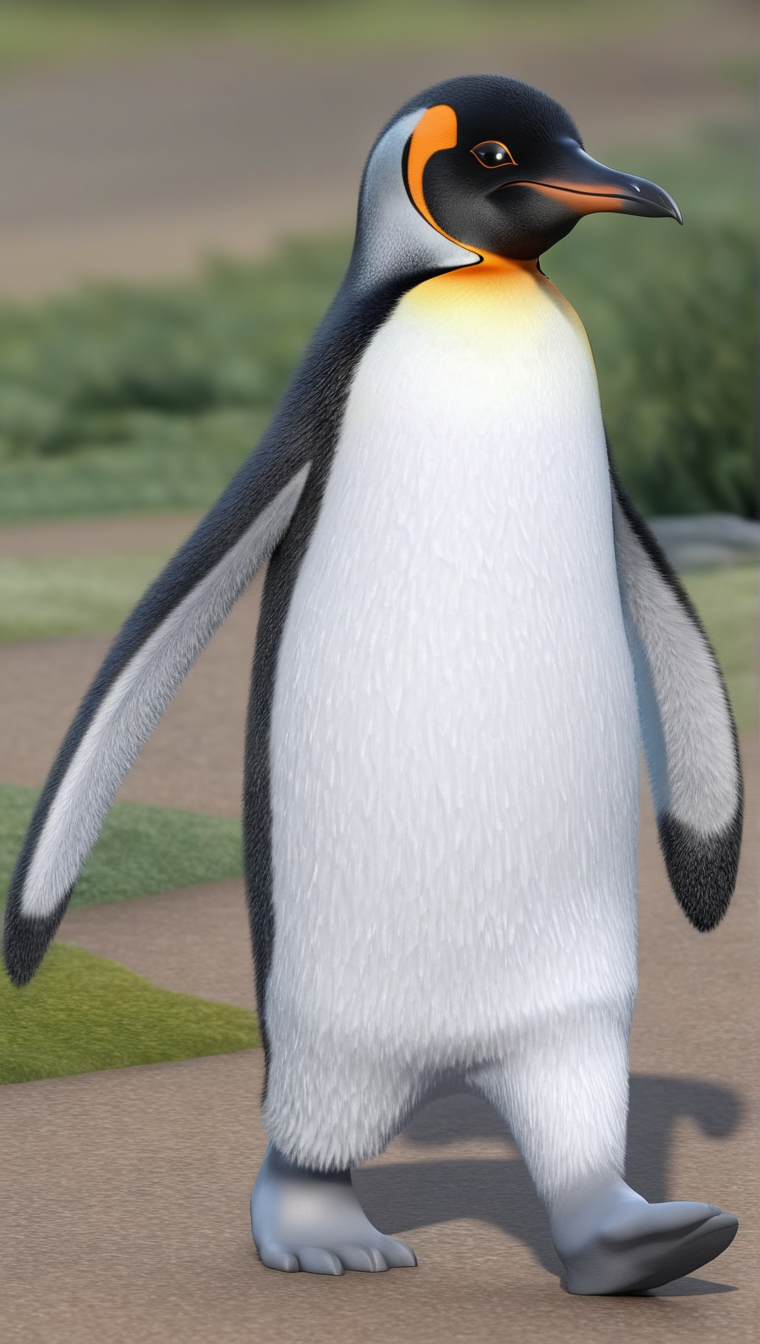

In [14]:
image